# Tidyverse

And now for something completely different. Having invested all that time in learning the rudiments of base R, we’re now going to look at a sort of specialized idiom has recently come to prominence in the community of R users.

R has always been somewhat heterogeneous, and there are often different, competing ways of doing the same task, each with its partisans. Tidyverse is the name of a set of interoperable **packages**, or extensions to base R, that share a common idiom (or "philosophy").

## More information

The definitive guide is [R For Data Science](https://r4ds.had.co.nz/) by Hadley Wickham and Garrett Grolemund. You can read it for free online, but I like having a paper copy, too.


## Packages

First, about packages more generally. R is open source, and lots of its functionality comes from user-contributed packages designed to solve specific problems. The home of R’s packages is [CRAN](https://cran.r-project.org/), the Comprehensive R Archive Network, although you can also find R code on [GitHub](https://github.com) and other places.

R has a built-in package management system. From the console, you can:

- see what packages are already installed with `installed.packages()`
- see what packages are available to install with `available.packages()`
- install packages by name with `install.packages()`

You can also use RStudio’s graphical interface to the package management system. Look under "Tools" → "Install Packages..."

Once you’ve installed a package, it will be available for subsequent R projects as well, but each time you want to use it in an R session or script, you have to **attach** it with the `library()` function.

### Installing Tidyverse

You'll only have to do this step once; if you already have tidyverse installed, you can skip it. Since I already have it, my output here will look different from yours. Actually, "tidyverse" is the name of a collection of packages which you'll see being installed individually.

In [1]:
install.packages('tidyverse')


The downloaded binary packages are in
	/var/folders/_k/nhmmjzg96r318bm9jvyvv7ph0000gn/T//RtmpYNMSGy/downloaded_packages


### Attaching the packages

This has to be done in every new R session. One reason is that these packages introduce a bunch of new objects into R’s search path, sometimes obscuring elements of base R that have the same name. (R will warn you of such overlaps, but they’re not fatal.) There's no point in cluttering up our environment with things that aren’t going to be used in a given session.

You might want to attach only one or two of the tidyverse packages, depending on what you’re doing. If you, you can name them specifically. Or use `tidyverse` to get the entire collection.

In [2]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



How has this changed our R session? We now have access to all the objects defined by these packages. For example, `dplyr` happens to provide a table of example data on characters from the "Star Wars" universe. If the following works for you, then you’ve successfully attached the package.

In [3]:
head(starwars)

name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species,films,vehicles,starships
<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<list>,<list>,<list>
Luke Skywalker,172,77,blond,fair,blue,19.0,male,masculine,Tatooine,Human,"The Empire Strikes Back, Revenge of the Sith , Return of the Jedi , A New Hope , The Force Awakens","Snowspeeder , Imperial Speeder Bike","X-wing , Imperial shuttle"
C-3PO,167,75,NA,gold,yellow,112.0,none,masculine,Tatooine,Droid,"The Empire Strikes Back, Attack of the Clones , The Phantom Menace , Revenge of the Sith , Return of the Jedi , A New Hope",,
R2-D2,96,32,NA,"white, blue",red,33.0,none,masculine,Naboo,Droid,"The Empire Strikes Back, Attack of the Clones , The Phantom Menace , Revenge of the Sith , Return of the Jedi , A New Hope , The Force Awakens",,
Darth Vader,202,136,none,white,yellow,41.9,male,masculine,Tatooine,Human,"The Empire Strikes Back, Revenge of the Sith , Return of the Jedi , A New Hope",,TIE Advanced x1
Leia Organa,150,49,brown,light,brown,19.0,female,feminine,Alderaan,Human,"The Empire Strikes Back, Revenge of the Sith , Return of the Jedi , A New Hope , The Force Awakens",Imperial Speeder Bike,
Owen Lars,178,120,"brown, grey",light,blue,52.0,male,masculine,Tatooine,Human,"Attack of the Clones, Revenge of the Sith , A New Hope",,


## Life in the tidyverse

For the purposes of this tutorial, working with tidyverse packages introduces a couple of new features that expand what we can do with R:

 - a more powerful tabular data structure, the **tibble**
 - a coherent suite of text processing tools, **stringr**
 - a suite of visualization tools, **ggplot2**
 - a useful programming construct, the **pipe** `%>%`
 
You can pick and choose among these and other tidyverse features. Some may be just what you never knew you always needed, and others may be flummoxing. Some may be both!

Tidyverse also brings along a coherent worldview: the [home page](https://www.tidyverse.org/) of the project describes it as "an *opinionated* collection of R packages designed for data science" \[emphasis added\]. In particular, tidy R tends to favour:

 - **tidy data**: every column is a variable and every row is an observation
 - **functional programming**: code focuses on verbs, not nouns
 
Again, you can take or leave these attitudes, but you’ll certainly encounter them in the literature.

### Tibbles

Tibbles are more or less a drop-in replacement for data frames that are specially designed for transforming and re-shaping tidy data.

Let’s load the *Iliad* speech data from our previous example, this time as a tibble.

In [4]:
filename <- 'https://raw.githubusercontent.com/cwf2/rostock_r/main/data/iliad_speeches.csv'
speeches <- read_csv(filename)

Rows: 698 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): work, speaker, addressee, simple_cluster_type, spkr_type
dbl (7): book, from_line, to_line, cluster_id, cluster_part, length, embedde...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


⚠️ The function used here is `read_csv()`, provided by the package **readr**, and *not* `read.csv()` from base R.



In [5]:
print(speeches)

# A tibble: 698 × 12
   work   book from_line to_line speaker   addressee     cluster_id cluster_part
   <chr> <dbl>     <dbl>   <dbl> <chr>     <chr>              <dbl>        <dbl>
 1 Iliad     1        17      21 Chryses   Agamemnon an…          1            1
 2 Iliad     1        26      32 Agamemnon Chryses                1            2
 3 Iliad     1        37      42 Chryses   Apollo                 2            1
 4 Iliad     1        59      67 Achilles  Agamemnon              3            1
 5 Iliad     1        74      83 Calchas   Achilles               3            2
 6 Iliad     1        85      91 Achilles  Calchas                3            3
 7 Iliad     1        93     100 Calchas   Achilles               3            4
 8 Iliad     1       106     120 Agamemnon Calchas                3            5
 9 Iliad     1       122     129 Achilles  Agamemnon              3            6
10 Iliad     1       131     147 Agamemnon Achilles               3            7
# … wit

### Subsetting data in a tibble

You can index a tibble in the same way you do a data frame:

In [6]:
speeches[1:5,]

work,book,from_line,to_line,speaker,addressee,cluster_id,cluster_part,simple_cluster_type,length,embedded_level,spkr_type
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>
Iliad,1,17,21,Chryses,Agamemnon and Greeks,1,1,general interlocution,5,0,mortal
Iliad,1,26,32,Agamemnon,Chryses,1,2,general interlocution,7,0,mortal
Iliad,1,37,42,Chryses,Apollo,2,1,monologue,6,0,mortal
Iliad,1,59,67,Achilles,Agamemnon,3,1,general interlocution,9,0,mortal
Iliad,1,74,83,Calchas,Achilles,3,2,general interlocution,10,0,mortal


In [7]:
speeches[speeches$speaker == 'Aphrodite', c('speaker', 'addressee', 'length')]

speaker,addressee,length
<chr>,<chr>,<dbl>
Aphrodite,Helena,5
Aphrodite,Helena,4
Aphrodite,Ares,4
Aphrodite,Dione,5
Aphrodite,Hera,3
Aphrodite,Hera,2
Aphrodite,Hera,3


But the preferred method for accessing a subset of tibble data is with two new functions:
- `filter()`, for subsetting rows
- `select()`, for subsetting columns

In [8]:
filter(speeches, speaker=='Aphrodite')

work,book,from_line,to_line,speaker,addressee,cluster_id,cluster_part,simple_cluster_type,length,embedded_level,spkr_type
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>
Iliad,3,390,394,Aphrodite,Helena,43,1,dialogue,5,0,god
Iliad,3,414,417,Aphrodite,Helena,43,3,dialogue,4,0,god
Iliad,5,359,362,Aphrodite,Ares,70,1,monologue,4,0,god
Iliad,5,376,380,Aphrodite,Dione,71,2,dialogue,5,0,god
Iliad,14,194,196,Aphrodite,Hera,200,2,dialogue,3,0,god
Iliad,14,212,213,Aphrodite,Hera,200,4,dialogue,2,0,god
Iliad,14,219,221,Aphrodite,Hera,200,5,dialogue,3,0,god


In [9]:
select(speeches, c(speaker, addressee))

speaker,addressee
<chr>,<chr>
Chryses,Agamemnon and Greeks
Agamemnon,Chryses
Chryses,Apollo
Achilles,Agamemnon
Calchas,Achilles
Achilles,Calchas
Calchas,Achilles
Agamemnon,Calchas
Achilles,Agamemnon


Why functions? Because tidyverse likes verbs. But the elegance of this system will become apparent as soon as we introduce the pipe. The **pipe**, written `%>%` and pronounced ("and then"), is a way of chaining functions together. It takes whatever is on the right and calls it as a function, supplying whatever is on the left as the first argument.

You use it like this:

In [10]:
speeches %>% filter(speaker=='Aphrodite') %>% select(speaker, addressee)

speaker,addressee
<chr>,<chr>
Aphrodite,Helena
Aphrodite,Helena
Aphrodite,Ares
Aphrodite,Dione
Aphrodite,Hera
Aphrodite,Hera
Aphrodite,Hera


That is,

- start with speeches
- *and then* filter by speaker
- *and then* select speaker and addressee

You could write this without the pipe as well:

In [11]:
select(
    filter(speeches, speaker=='Aphrodite'),
    speaker, addressee
)

speaker,addressee
<chr>,<chr>
Aphrodite,Helena
Aphrodite,Helena
Aphrodite,Ares
Aphrodite,Dione
Aphrodite,Hera
Aphrodite,Hera
Aphrodite,Hera


But the pipe lets you write the functions in the order that you want things to happen, rather than "inside-out".

### Sorting

We can change the order of rows with `arrange()`:

In [12]:
speeches %>% 
    filter(speaker=='Aphrodite') %>% 
    select(speaker, addressee) %>%
    arrange(addressee)

speaker,addressee
<chr>,<chr>
Aphrodite,Ares
Aphrodite,Dione
Aphrodite,Helena
Aphrodite,Helena
Aphrodite,Hera
Aphrodite,Hera
Aphrodite,Hera


### Creating columns

A common task with tabular data is creating new columns, calculated from existing ones. Think of your workflow in an Excel spreadsheet. For example, maybe we want to create a new column `calc_len` which calculates the length of speeches based on the `from_line` and `to_line` values.

Two functions can do this task:

- `mutate()` will create a new column and add it to the table
- `transmute()` will create a new column and throw away everything else

Let's continue to work just with Aphrodite's speeches, so we can see the pipe in action. I'm going to include the original `length` column, as well, just to check my work.

In [13]:
speeches %>%
   filter(speaker=='Aphrodite') %>%
   select(from_line, to_line, speaker, addressee, length) %>%
   mutate(calc_len = to_line-from_line)

from_line,to_line,speaker,addressee,length,calc_len
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
390,394,Aphrodite,Helena,5,4
414,417,Aphrodite,Helena,4,3
359,362,Aphrodite,Ares,4,3
376,380,Aphrodite,Dione,5,4
194,196,Aphrodite,Hera,3,2
212,213,Aphrodite,Hera,2,1
219,221,Aphrodite,Hera,3,2


🤭 Ooops! I forgot that the line counts are inclusive of both ends. Let's fix that:

In [14]:
speeches %>%
   filter(speaker=='Aphrodite') %>%
   select(from_line, to_line, speaker, addressee, length) %>%
   mutate(calc_len = to_line-from_line+1)

from_line,to_line,speaker,addressee,length,calc_len
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
390,394,Aphrodite,Helena,5,5
414,417,Aphrodite,Helena,4,4
359,362,Aphrodite,Ares,4,4
376,380,Aphrodite,Dione,5,5
194,196,Aphrodite,Hera,3,3
212,213,Aphrodite,Hera,2,2
219,221,Aphrodite,Hera,3,3


Here’s how we might do it with `transmute()` which drops any columns whose values aren’t specified. While we’re at it, let’s sort by length with the longest speeches at the top.

In [15]:
speeches %>%
   filter(speaker=='Aphrodite') %>%
   transmute(
       speaker = speaker,
       addressee = addressee,
       calc_len = to_line-from_line+1) %>%
   arrange(desc(calc_len))

speaker,addressee,calc_len
<chr>,<chr>,<dbl>
Aphrodite,Helena,5
Aphrodite,Dione,5
Aphrodite,Helena,4
Aphrodite,Ares,4
Aphrodite,Hera,3
Aphrodite,Hera,3
Aphrodite,Hera,2


### Summarizing

We can group and summarise data in tibbles using two more helper functions:

- `group_by()`
- `summarise()`

This is a lot like creating a pivot table in Excel. The `summarise()` function collapses columns to single values using an aggregating function that you choose. Some common examples are `sum()` which adds all the values, `mean()` which takes their average, and `n()` which simply counts them. But other options include `first()`, `last()`, `min()`, `max()`, etc. See further discussion [here](https://r4ds.had.co.nz/transform.html?q=aggregate#summarise-funs).

Meanwhile, `group_by()` lets you choose variables along which you want your agregation to take place. This is like adding a column to the "rows" pane of a pivot table in Excel.

First, let me change `simple_cluster_type` and `spkr_type` to factors again.

In [16]:
speeches <- speeches %>%
    mutate(
        simple_cluster_type = factor(simple_cluster_type),
        spkr_type = factor(spkr_type)
    )

Now let’s re-create the summary table we made earlier. We’ll group by `spkr_type` and `simple_cluster_type`, then summarise by `n()`, i.e., the count of observations.

In [17]:
speeches %>%
    group_by(spkr_type, simple_cluster_type) %>%
    summarise(speeches=n())

`summarise()` has grouped output by 'spkr_type'. You can override using the
`.groups` argument.


spkr_type,simple_cluster_type,speeches
<fct>,<fct>,<int>
animals,dialogue,1
collective,monologue,1
god,dialogue,100
god,general interlocution,30
god,monologue,62
god,soliloquy,1
mortal,dialogue,168
mortal,general interlocution,136
mortal,monologue,167


In fact, I don’t really care about the single instances of animals and collectives. I’m going to filter them out.

In [18]:
speeches %>%
    filter(spkr_type == 'mortal' | spkr_type == 'god') %>%
    group_by(spkr_type, simple_cluster_type) %>%
    summarise(speeches=n())

`summarise()` has grouped output by 'spkr_type'. You can override using the
`.groups` argument.


spkr_type,simple_cluster_type,speeches
<fct>,<fct>,<int>
god,dialogue,100
god,general interlocution,30
god,monologue,62
god,soliloquy,1
mortal,dialogue,168
mortal,general interlocution,136
mortal,monologue,167
mortal,soliloquy,32


Here's a quick visualization using **ggplot2**. We’ll have to spend some time later to explain the details of how the graph is created.

`summarise()` has grouped output by 'spkr_type'. You can override using the
`.groups` argument.


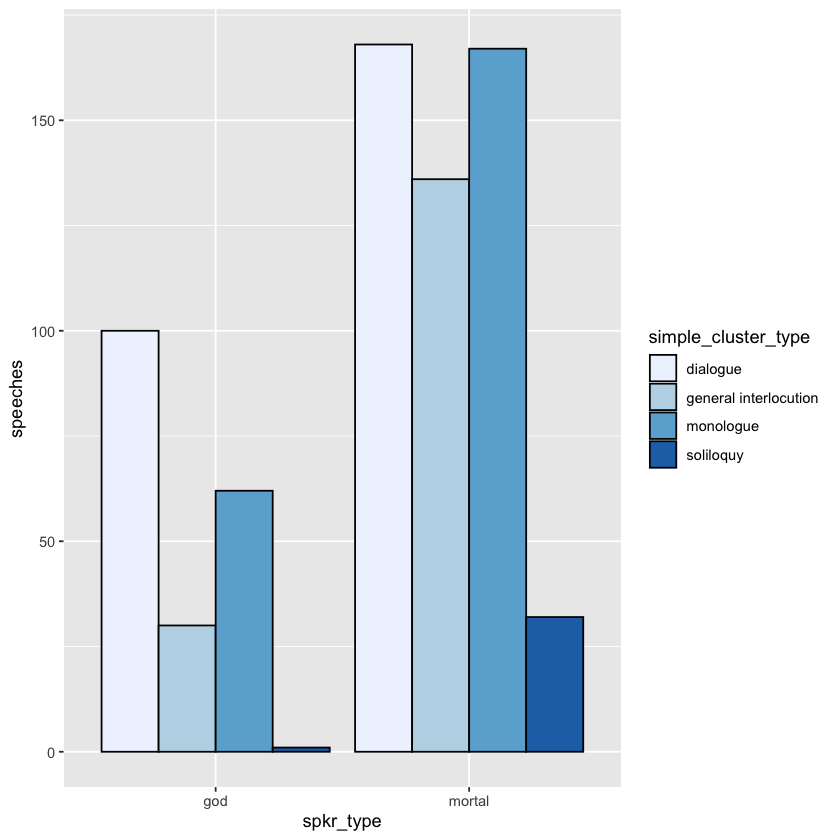

In [19]:
speech_counts <- speeches %>%
    filter(spkr_type == 'mortal' | spkr_type == 'god') %>%
    group_by(spkr_type, simple_cluster_type) %>%
    summarise(speeches=n())

ggplot(speech_counts) + 
    aes(x=spkr_type, y=speeches, fill=simple_cluster_type) +
    geom_bar(stat='identity', position=position_dodge(), color='black') +
    scale_fill_brewer(palette = "Blues")

Let’s break here and spend some time exploring our own data individually.